**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Load Dataset

In [ ]:
url = "https://raw.githubusercontent.com/Marvel280904/W7---DataMining---Marvel/refs/heads/main/bank.csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
columns = ['age', 'job', 'marital', 'education', 'default', 'balance',
           'housing', 'loan', 'contact', 'day', 'month', 'duration',
           'campaign', 'pdays', 'previous', 'poutcome', 'y']

for col in columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for age:
age
34    231
32    224
31    199
36    188
33    186
     ... 
68      2
87      1
81      1
86      1
84      1
Name: count, Length: 67, dtype: int64


Value counts for job:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


Value counts for marital:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


Value counts for education:
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


Value counts for default:
default
no     4445
yes      76
Name: count, dtype: int64


Value counts for balance:
balance
0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: count, Le

In [ ]:
df.replace("unknown", np.nan, inplace=True)

In [ ]:
df.isnull().sum() # setelah di replace unknown nya

,0
age,0
job,38
marital,0
education,187
default,0
balance,0
housing,0
loan,0
contact,1324
day,0


In [ ]:
for col in ['job', 'education', 'contact', 'poutcome']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum() # cek missing value setelah di fill missing value nya

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


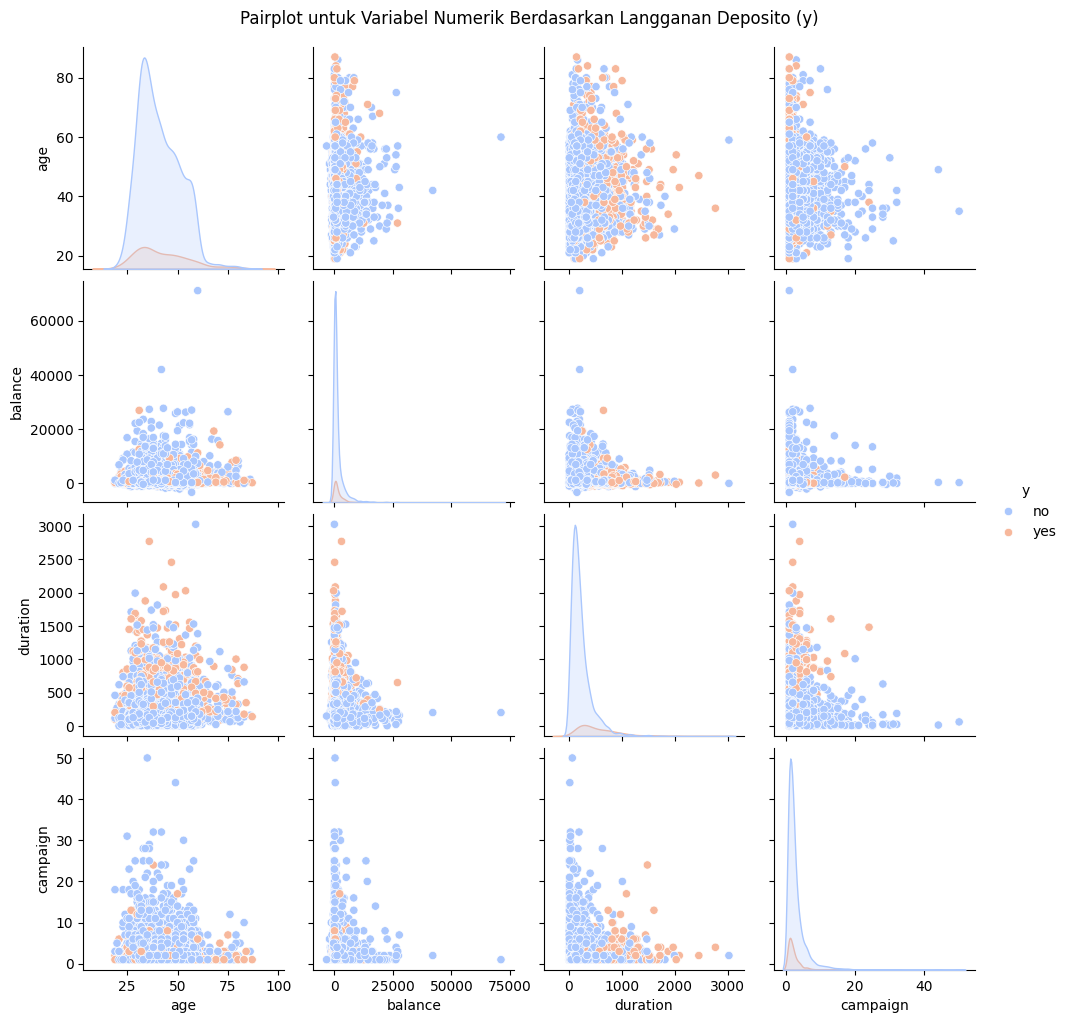

In [ ]:
# visualisasi pairplot untuk beberapa kolom numerik, dengan hue berdasarkan kolom 'y'
sns.pairplot(df, vars=['age', 'balance', 'duration', 'campaign'], hue='y', palette='coolwarm')
plt.suptitle('Pairplot untuk Variabel Numerik Berdasarkan Langganan Deposito (y)', y=1.02)
plt.show()

Gambar ini menunjukkan *pairplot* dari beberapa variabel numerik terkait langganan deposito (`y`) pada data. Berikut beberapa kesimpulan utama dari pola yang terlihat:

1. **Age**: Terlihat bahwa orang yang lebih tua cenderung lebih sedikit tertarik untuk berlangganan deposito. Sebagian besar pelanggan dengan langganan (`y = yes`) berusia antara 20 hingga 60 tahun.

2. **Balance**: Distribusi saldo terlihat terpusat di nilai rendah (di bawah 20.000) untuk sebagian besar pelanggan, baik yang berlangganan maupun yang tidak.

3. **Duration**: Ada korelasi yang jelas antara durasi panggilan dengan langganan deposito; pelanggan dengan durasi panggilan lebih lama cenderung lebih banyak yang berlangganan (`y = yes`).

4. **Campaign**: Pelanggan yang lebih sering dihubungi dalam kampanye cenderung memiliki saldo lebih rendah, dan semakin sering dihubungi tidak selalu meningkatkan peluang berlangganan deposito.

Secara keseluruhan, durasi panggilan (duration) terlihat sebagai faktor yang paling berkorelasi positif dengan langganan deposito, sementara variabel lain seperti usia dan saldo menunjukkan tren yang lebih lemah.

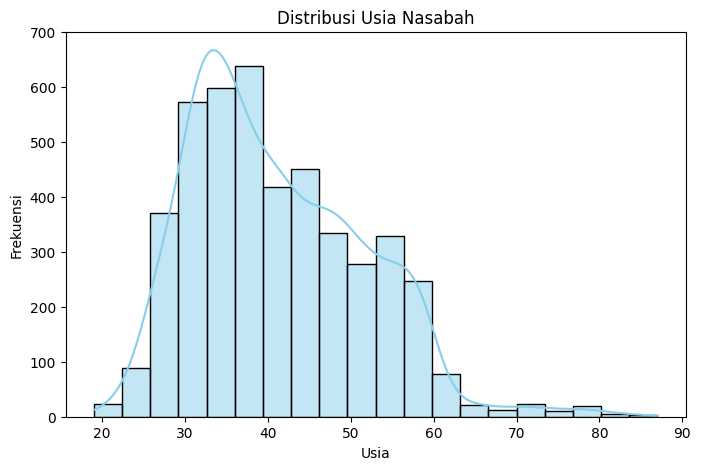

In [ ]:
# histogram distribusi usia
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Nasabah')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

Gambar ini menunjukkan distribusi usia nasabah dalam bentuk histogram. Berikut adalah beberapa kesimpulan utama:

1. **Mayoritas Usia Nasabah**: Usia nasabah terkonsentrasi pada rentang 30-40 tahun, dengan puncak frekuensi sekitar usia 35 tahun. Ini menunjukkan bahwa sebagian besar nasabah berada dalam kelompok usia produktif.

2. **Distribusi Positif Skewed**: Distribusi usia terlihat sedikit condong ke kanan (positif skewed), artinya ada lebih sedikit nasabah yang berusia di atas 60 tahun.

3. **Kelompok Usia Lanjut**: Hanya sedikit nasabah yang berusia di atas 60 tahun, dan frekuensi menurun drastis setelah usia 50 tahun.

Secara keseluruhan, nasabah dalam data ini didominasi oleh orang dewasa muda hingga paruh baya, dengan sedikit representasi dari kelompok usia yang lebih tua.

In [ ]:
df['job'] = df['job'].replace(['admin.', 'management'], 'admin_management') # merge admin dengan management

print(df['job'].value_counts()) # cek value counts setelah di merge

job
admin_management    1485
blue-collar          946
technician           768
services             417
retired              230
self-employed        183
entrepreneur         168
unemployed           128
housemaid            112
student               84
Name: count, dtype: int64


In [ ]:
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3508,52,3,1,1,0,14363,0,0,0,5,6,132,1,-1,0,0,0
1930,32,6,1,1,0,255,1,1,0,21,8,86,2,-1,0,0,0
622,32,1,2,1,0,-84,1,0,0,11,8,426,1,-1,0,0,0
1796,34,0,1,1,0,15,0,0,0,25,1,184,7,-1,0,0,0
2991,37,0,0,2,0,0,1,0,0,11,8,217,6,-1,0,0,0
1501,46,8,1,1,0,57,0,0,0,28,8,796,1,-1,0,0,1
4253,35,0,1,2,0,3161,0,0,0,8,1,433,2,-1,0,0,0
4335,37,6,2,1,0,105,0,1,0,17,6,260,4,-1,0,0,0
2529,48,0,2,2,0,8106,0,0,0,17,9,125,1,111,3,0,0
2709,32,0,1,2,0,273,1,1,0,18,5,97,3,-1,0,0,0


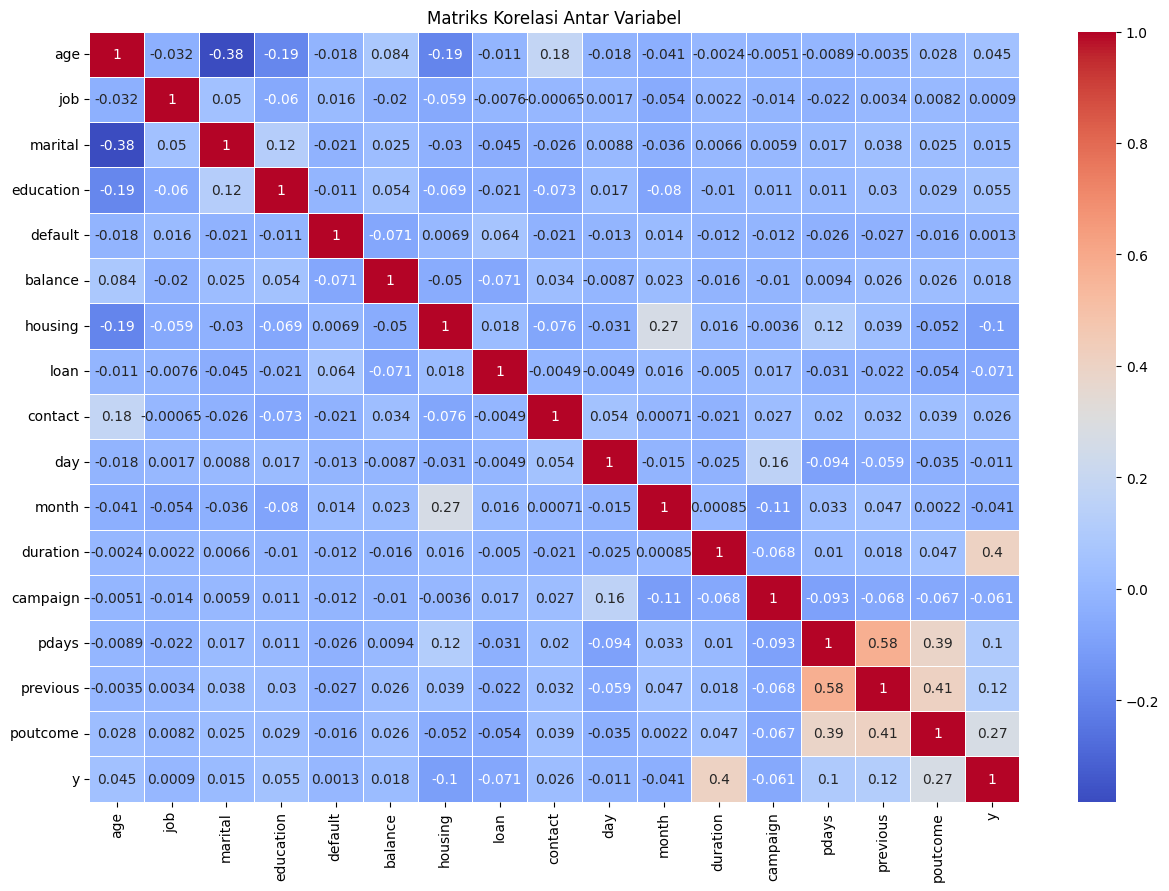

In [ ]:
# Visualisasi Heatmap korelasi antar variabel
plt.figure(figsize=(15, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

Gambar ini menunjukkan matriks korelasi antara variabel-variabel dalam data. Berikut beberapa kesimpulan penting:

1. **Korelasi Durasi dan Langganan (y)**: Variabel `duration` memiliki korelasi yang cukup tinggi dengan variabel `y` (0,4). Ini mengindikasikan bahwa semakin lama durasi panggilan, semakin tinggi kemungkinan nasabah berlangganan deposito.

2. **Korelasi Antar Variabel Kampanye**: Variabel `pdays`, `previous`, dan `poutcome` memiliki korelasi moderat satu sama lain (sekitar 0,3-0,5). Ini menunjukkan bahwa ada keterkaitan antara jumlah kontak sebelumnya (`pdays`), jumlah kampanye sebelumnya (`previous`), dan hasil dari kampanye terakhir (`poutcome`).

3. **Korelasi Lemah Secara Umum**: Sebagian besar variabel memiliki korelasi yang lemah (mendekati 0), baik satu sama lain maupun dengan variabel target (`y`). Hal ini menunjukkan bahwa variabel-variabel ini tidak memiliki hubungan linear yang kuat, sehingga mungkin ada faktor lain atau interaksi non-linear yang mempengaruhi hasil.

Secara keseluruhan, variabel `duration` tampaknya merupakan indikator terkuat untuk memprediksi langganan deposito, sedangkan variabel lainnya memiliki hubungan yang lebih lemah dengan `y`.

In [ ]:
print(f"Nilai unik untuk kolom y:")
print(df["y"].unique())

Nilai unik untuk kolom y:
[0 1]


## Machine Learning

In [ ]:
X = df.drop(['y'], axis = 1)
y = df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((3616, 16), (905, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
print('Model accuracy score with RandomForestClassifier: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))

print('Training set score: {0:0.4f}' .format(rf_clf.score(X_train, y_train)))

print('Test set score: {0:0.4f}' .format(rf_clf.score(X_test, y_test)))

Model accuracy score with RandomForestClassifier: 0.8994
Training set score: 1.0000
Test set score: 0.8994


In [ ]:
RFC = confusion_matrix(y_test, y_pred_rf)
print('Confusion matrix RandomForestClassifier: \n', RFC)

print('\nClassification Report RandomForestClassifier:')
print(classification_report(y_test, y_pred_rf))

Confusion matrix RandomForestClassifier: 
 [[787  20]
 [ 71  27]]

Classification Report RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.57      0.28      0.37        98

    accuracy                           0.90       905
   macro avg       0.75      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [ ]:
gbc_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_features = 4)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=4, random_state=42)

In [ ]:
y_pred_gbc = gbc_clf.predict(X_test)

In [ ]:
print('Model accuracy score with GradientBoostingClassifier: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gbc)))

print('Training set score: {0:0.4f}' .format(gbc_clf.score(X_train, y_train)))

print('Test set score: {0:0.4f}' .format(gbc_clf.score(X_test, y_test)))

Model accuracy score with GradientBoostingClassifier: 0.8961
Training set score: 0.9284
Test set score: 0.8961


In [ ]:
GBC = confusion_matrix(y_test, y_pred_rf)
print('Confusion matrix GradientBoostingClassifier: \n', GBC)

print('\nClassification Report GradientBoostingClassifier:')
print(classification_report(y_test, y_pred_gbc))

Confusion matrix GradientBoostingClassifier: 
 [[787  20]
 [ 71  27]]

Classification Report GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.54      0.28      0.36        98

    accuracy                           0.90       905
   macro avg       0.73      0.62      0.65       905
weighted avg       0.88      0.90      0.88       905



# **Kesimpulan**

## **Random Forest**

Model accuracy score with RandomForestClassifier: 0.8994

Training set score: 1.0000

Test set score: 0.8994

Confusion matrix RandomForestClassifier:

 [[787  20]

 [ 71  27]]

Classification Report RandomForestClassifier:

                    precision    recall  f1-score   support

               0       0.92      0.98      0.95       807
               1       0.57      0.28      0.37        98

        accuracy                           0.90       905
       macro avg       0.75      0.63      0.66       905
    weighted avg       0.88      0.90      0.88       905


## **Gradient Boosting Classifier**

Model accuracy score with GradientBoostingClassifier: 0.8961

Training set score: 0.9284

Test set score: 0.8961

Confusion matrix GradientBoostingClassifier:

 [[787  20]

 [ 71  27]]

Classification Report GradientBoostingClassifier:

                    precision    recall  f1-score   support

               0       0.92      0.97      0.94       807
               1       0.54      0.28      0.36        98

        accuracy                           0.90       905
       macro avg       0.73      0.62      0.65       905
    weighted avg       0.88      0.90      0.88       905


Akurasi Model: Akurasi pengklasifikasi Random Forest dan Gradient Boosting  sangat mirip, yaitu 89,94 n 89,61%, tetapi Random Forest sedikit lebih tinggi.

Kinerja untuk kelas positif (1): Kedua model  memprediksi kelas 1 (berlangganan deposit) seperti yang ditunjukkan oleh recall yang rendah (28%) dan skor f1 yang rendah (0,37 untuk hutan acak dan 0,36 untuk gradien) sulit dilakukan.
mendorong). Hal ini menunjukkan bahwa model mampu memprediksi kelas mayoritas (kelas 0) lebih akurat dibandingkan kelas minoritas (kelas 1).

Matriks kebingungan: Kedua model menunjukkan hasil yang serupa dalam matriks kebingungan, dengan 787 benar untuk kelas 0 dan 27 benar untuk kelas 1, menunjukkan bahwa model tersebut lebih sering  memprediksi kelas 1 secara salah.

Kesimpulan akhir: Meskipun model ini memiliki akurasi keseluruhan yang lebih tinggi, model ini tidak optimal untuk memprediksi kelas 1. Hal ini menunjukkan bahwa teknik untuk menangani data yang tidak seimbang, seperti oversampling dan undersampling, berpotensi diperlukan untuk meningkatkan hasil prediksi pada kelas minoritas.

